這部份表示修復動作的排序與人工補丁的越相似，是否與修復補丁數量有關。  
相似度以Kendall's tau計算得出。  
H0：表示APR採用的修復動作數量排序與人工採用的越相似，與生成補丁數量無關  
H1：表示APR採用的修復動作數量排序與人工採用的越相似，與生成補丁數量有關  
若是p-value小於0.05，表示拒絕虛無假設，H1為真。  

皮爾森相關係數 (r): 0.7671
p-value: 0.0441
✅ 拒絕 H₀：Kendall’s tau與補丁數量有顯著線性相關。


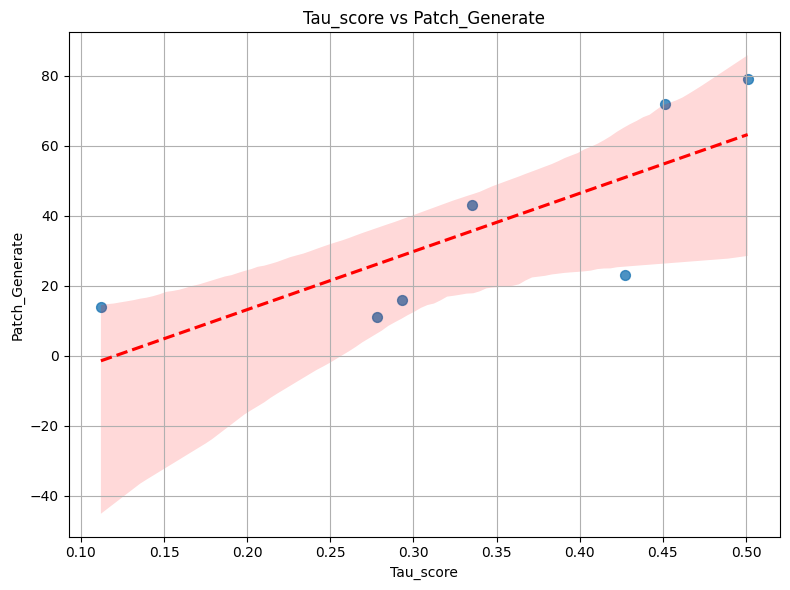

                            OLS Regression Results                            
Dep. Variable:         Patch_Generate   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     7.150
Date:                Thu, 05 Jun 2025   Prob (F-statistic):             0.0441
Time:                        10:13:53   Log-Likelihood:                -29.730
No. Observations:                   7   AIC:                             63.46
Df Residuals:                       5   BIC:                             63.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.0136     22.574     -0.887      0.4

c:\Users\User\.conda\envs\grade_environment\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [2]:
# 將資料集細分

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 建立資料集（可直接貼上）
data = {
    'APR': ['ACS',
            'jGenProg',
            'jKali',
            'jMutRepair',
            'Nopol',
            'SimFix',
            'TBar'],
    'Tau_score': [0.427, 0.293, 0.278, 0.112, 0.335, 0.451, 0.501],
    'Patch_Generate': [23, 16, 11, 14, 43, 72, 79]
}

df = pd.DataFrame(data)

# 計算皮爾森相關係數
corr, p_value = pearsonr(df['Tau_score'], df['Patch_Generate'])

print(f"皮爾森相關係數 (r): {corr:.4f}")
print(f"p-value: {p_value:.4f}")

# 根據結果解釋
alpha = 0.05
if p_value < alpha:
    print("✅ 拒絕 H₀：Kendall’s tau與補丁數量有顯著線性相關。")
else:
    print("❌ 無法拒絕 H₀：尚無足夠證據顯示Kendall’s tau與補丁數量有關聯。")

# 視覺化
plt.figure(figsize=(8,6))
sns.regplot(x='Tau_score', y='Patch_Generate', data=df, scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})
plt.title('Tau_score vs Patch_Generate')
plt.xlabel('Tau_score')
plt.ylabel('Patch_Generate')
plt.grid(True)
plt.tight_layout()
plt.show()


import statsmodels.api as sm
X = sm.add_constant(df['Tau_score'])
model = sm.OLS(df['Patch_Generate'], X).fit()
print(model.summary())

皮爾森相關係數 (r): 0.5521
p-value: 0.002829
✅ 拒絕 Tau_score 與 Patch_Generate 有顯著線性相關。


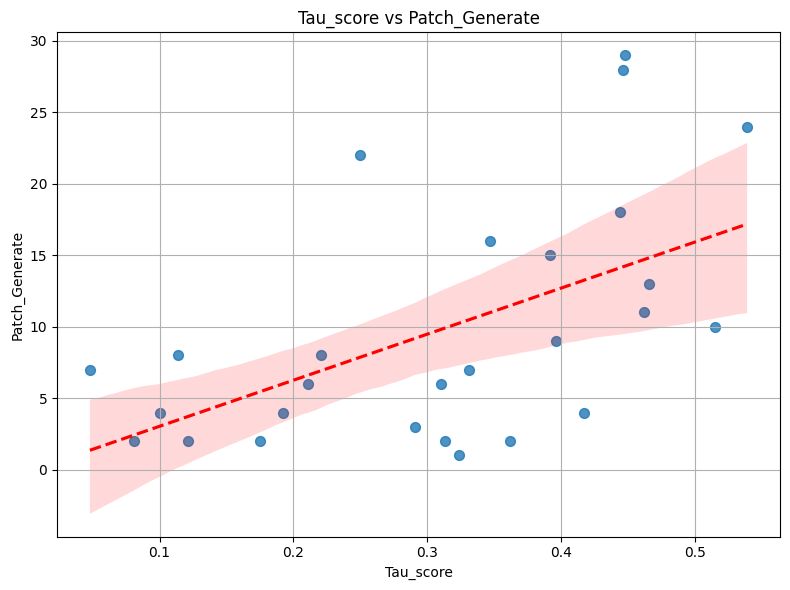

<Axes: xlabel='Tau_score', ylabel='Patch_Generate'>

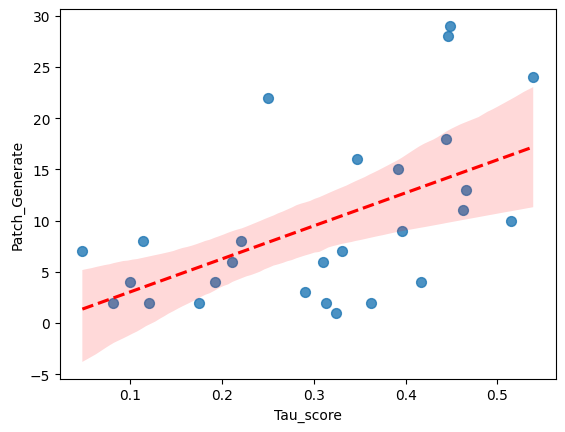

In [3]:
# 去除補丁為0的問題
# 因為補丁數量為0的話，會造成Kendall's tau計算錯誤，會存在除以0的情況，因此不討論
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 資料：欄位名稱已更新
data = {
    'APR': [
        'ACS-Chart', 'ACS-Lang', 'ACS-Math', 'ACS-Time',
        'jGenProg-Chart', 'jGenProg-Lang', 'jGenProg-Math',
        'jKali-Chart', 'jKali-Lang', 'jKali-Math',
        'jMutRepair-Chart', 'jMutRepair-Lang', 'jMutRepair-Math',
        'Nopol-Chart', 'Nopol-Lang', 'Nopol-Math', 'Nopol-Time',
        'SimFix-Chart', 'SimFix-Closure', 'SimFix-Lang', 'SimFix-Math', 'SimFix-Time',
        'TBar-Chart', 'TBar-Closure', 'TBar-Lang', 'TBar-Math', 'TBar-Time'
    ],
    'Tau_score': [
        0.362, 0.417, 0.347, 0.324,
        0.048, 0.175, 0.331,
        0.211, 0.081, 0.291,
        0.1, 0.121, 0.114,
        0.396, 0.192, 0.25, 0.221,
        0.515, 0.444, 0.466, 0.448, 0.313,
        0.462, 0.539, 0.392, 0.446, 0.31
    ],
    'Patch_Generate': [
        2, 4, 16, 1,
        7, 2, 7,
        6, 2, 3,
        4, 2, 8,
        9, 4, 22, 8,
        10, 18, 13, 29, 2,
        11, 24, 15, 28, 6
    ]
}

df = pd.DataFrame(data)

# 計算皮爾森相關係數
corr, p_value = pearsonr(df['Tau_score'], df['Patch_Generate'])

print(f"皮爾森相關係數 (r): {corr:.4f}")
print(f"p-value: {p_value:.6f}")

# 結果解釋
alpha = 0.05
if p_value < alpha:
    print("✅ 拒絕 H₀： Tau_score 與 Patch_Generate 有顯著線性相關。")
else:
    print("❌ 無法拒絕 H₀：尚無證據顯示兩者有關。")

# 畫圖
plt.figure(figsize=(8,6))
sns.regplot(x='Tau_score', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})
plt.title('Tau_score vs Patch_Generate')
plt.xlabel('Tau_score')
plt.ylabel('Patch_Generate')
plt.grid(True)
plt.tight_layout()
plt.show()

# 加上趨勢
sns.regplot(x='Tau_score', y='Patch_Generate', data=df,
            scatter_kws={'s':50}, line_kws={"color":"red", "linestyle":"--"})

In [ ]:
# 錯誤，不要執行這部分

# import numpy as np
# import pandas as pd
# from scipy.stats import pearsonr, spearmanr

# # 數據準備
# data = {
#     '人工': [ 1, 0, 0, 0, 0, 0, 0, 0, 1, 13, 4, 1, 0, 1, 0, 5, 0, 4, 0, 1, 7, 0, 6, 0, 0, 3, 0, 1, 1, 2, 13, 0, 1, 0, 2, 9, 1, 7, 3, 0, 0, 0, 1, 0, 2, 0, 0, 3, 6, 1 ],
#     '補丁數量_人工': [26] * 26,
#     'ACS': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
#     '補丁數量_ACS': [0] * 26,
#     'jGenProg': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
#     '補丁數量_jGenProg': [0] * 26,
#     'jKali': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ],
#     '補丁數量_jKali': [0] * 26,
#     'jMutRepair': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], 
#     '補丁數量_jMutRepair': [0] * 26,
#     'Nopol':  [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ], 
#     '補丁數量_Nopol': [0] * 26,
#     'SimFix': [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 5, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0 ],
#     '補丁數量_SimFix': [18] * 26,
#     'TBar': [ 0, 1, 0, 0, 0, 0, 0, 0, 1, 6, 1, 4, 0, 0, 0, 3, 4, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 6, 5, 2, 0, 0, 0, 2, 1, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2 ],
#     '補丁數量_SimFix': [24] * 26
# }

# # 將數據轉換為 DataFrame
# df = pd.DataFrame(data)

# # 計算相關係數
# correlations = {
#     '人工 vs APR-1': pearsonr(df['人工'], df['補丁數量_APR-1']),
#     '人工 vs APR-2': pearsonr(df['人工'], df['補丁數量_APR-2']),
#     '人工 vs APR-3': pearsonr(df['人工'], df['補丁數量_APR-3']),
# }

# # 輸出結果
# for key, value in correlations.items():
#     print(f"{key}: 相關係數 = {value[0]}, p 值 = {value[1]}")

# # 檢驗假設
# alpha = 0.05  # 顯著性水平
# for key, value in correlations.items():
#     if value[1] < alpha:
#         print(f"{key}: 拒絕 H0，存在關聯性")
#     else:
#         print(f"{key}: 無法拒絕 H0，無關聯性")
